In [35]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("../data/chunk_audio_preview/metal_preview.wav")

Text(0, 0.5, 'Amplitude')

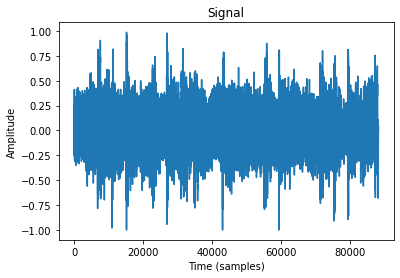

In [36]:
plt.plot(y)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')


Text(0, 0.5, 'Amplitude')

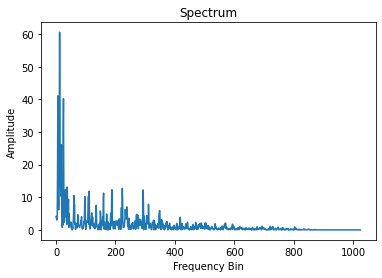

In [37]:
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length=n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')


Text(0.5, 1.0, 'Spectrogram')

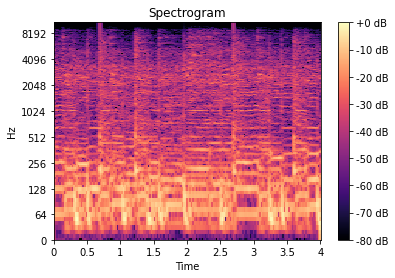

In [38]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')


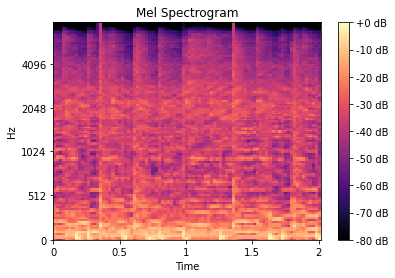

In [39]:
mel_spect = librosa.feature.melspectrogram(
    y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')


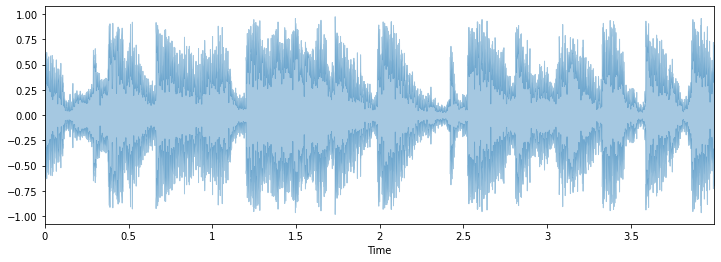

In [56]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveplot(y, sr=sr, alpha=.4)

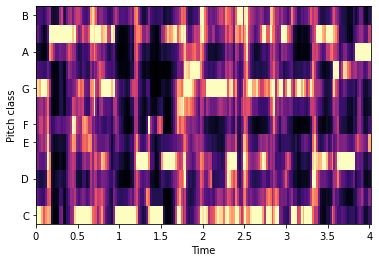

In [60]:
chroma = librosa.feature.chroma_stft(y, sr=sr)
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')

In [64]:
zero_cross_rate = librosa.zero_crossings(y, pad=False)
print(sum(zero_cross_rate))

10134


In [70]:

print(chroma.shape, spectral_rolloff.shape, sum(zero_cross_rate))


(12, 173) (173,) 10134


In [40]:
librosa.feature.melspectrogram(y).shape

(128, 173)

In [44]:
from glob import iglob
import os

data = []
data_dir = "../data/02/audio_files"
for folder in os.listdir(data_dir):
    print(folder)
    data_sub = []
    for file in os.listdir(os.path.join(data_dir,folder)):
        y, sr = librosa.load(os.path.join(data_dir, folder, file))
        data_sub.append(librosa.feature.melspectrogram(y=y, sr=sr))
    data.append(data_sub)


jazz
disco
rock
country
classical
metal
reggae
hiphop
pop
blues


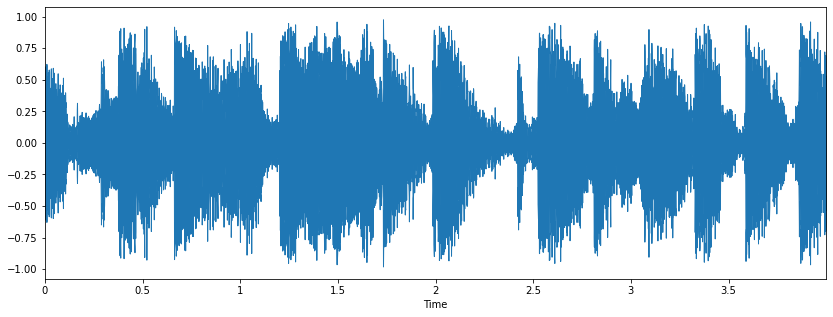

In [45]:
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)


In [ ]:
from playsound import playsound
from scipy.io import wavfile

sample_rate = 22050
metal_preview_path = "../data/chunk_audio_preview/metal_preview.wav"
pop_preview_path = "../data/chunk_audio_preview/pop_preview.wav"
playsound(metal_preview_path)
playsound(pop_preview_path)


playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


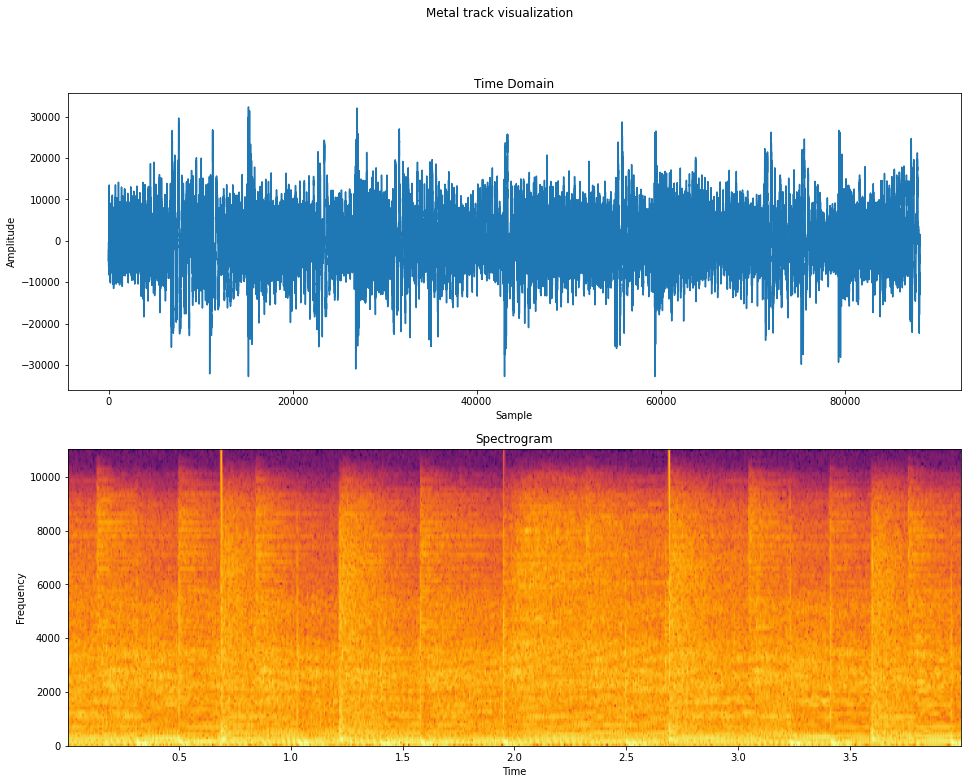

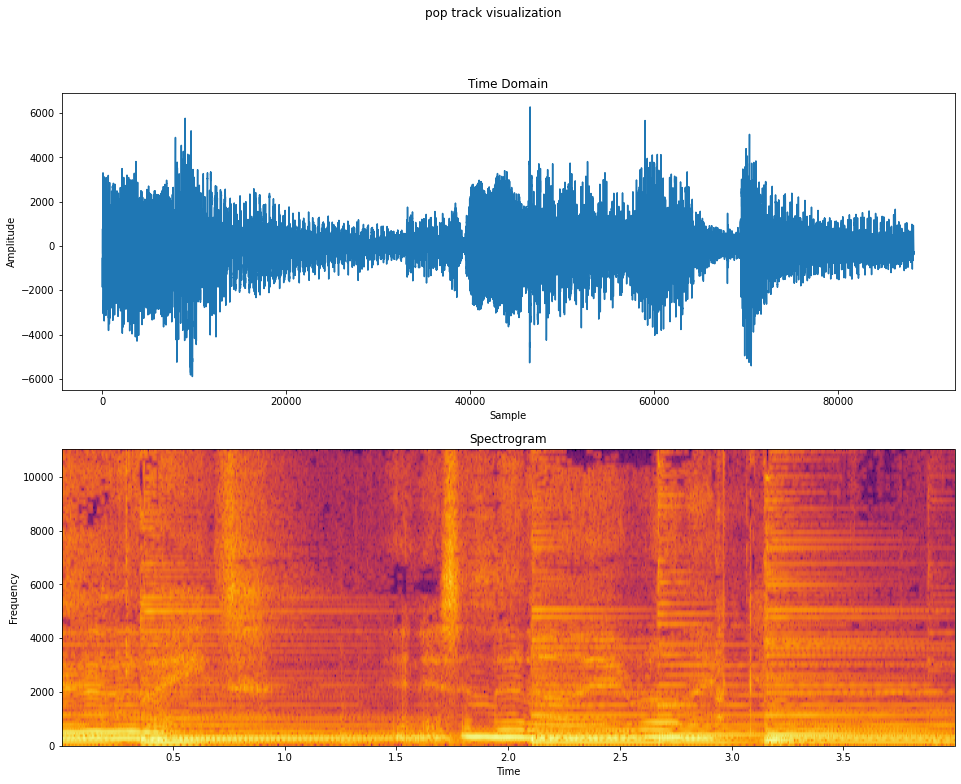

In [ ]:
metal_rate, metal_samples = wavfile.read(metal_preview_path)
pop_rate, pop_samples = wavfile.read(pop_preview_path)

plt.figure(figsize=(16,12))
plt.set_cmap('Dark2')
plt.suptitle('Metal track visualization')

plt.subplot(211)
plt.title('Time Domain')
plt.plot(metal_samples)
plt.xlabel('Sample')
plt.ylabel('Amplitude')


plt.subplot(212)
plt.title("Spectrogram")
plt.specgram(metal_samples, Fs=metal_rate, cmap="inferno")
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.figure(figsize=(16, 12))
plt.suptitle('pop track visualization')

plt.subplot(211)
plt.title('Time Domain')
plt.plot(pop_samples)
plt.xlabel('Sample')
plt.ylabel('Amplitude')


plt.subplot(212)
plt.title("Spectrogram")
plt.specgram(pop_samples, Fs=pop_rate, cmap="inferno")
plt.xlabel('Time')
plt.ylabel('Frequency')

_ = plt.show()
# 'psd', 'magnitude', 'angle', 'phase'
